# Children’s exploratory behavior in approximate number comparison 
Shirley Duong <br>
PSYC 85735 <br>
May 17, 2021

## Introduction

<b><i>In this notebook, I examine children's exploration behavior during an approximate number comparison assessment and the relations to task accuracy and general math abilities. I fit a couple of models describing children's exploration tendencies to real data, with the goal of learning how children navigate a complex choice task, and examine whether similar behaviors produce different outcomes.</i></b>

<br>

Our basic intuitions of quantity, or number sense, guide many of the everyday choices that we make. This ability to rapidly and intuitively estimate and compare quantities larger than 4 is supported by the Approximate Number System (ANS), which is present in infancy (e.g., Libertus & Brannon, 2009) and in non-human animals, such as primates, birds, and fish (e.g., Vallortigara, 2017). The ANS can be measured with a dot comparison task, in which participants indicate which array of dots is more numerous. Performance is ratio-dependent, such that numerosities that are closer to together are more difficult to discriminate (e.g., 12 vs. 24 is easier than 20 vs. 24; Libertus & Brannon, 2009). Individual differences in ANS acuity are associated with children’s math abilities and the potential mechanisms underlying this relation are sometimes attributed to children’s executive functioning (e.g., Libertus et al., 2013; Guillaume et al., 2013). 

Some researchers have posited that children who perform better on ANS tasks generally have better math skills and inhibitory control, which allows them to ignore irrelevant stimulus information. Relatedly, young children's performance on math assessments and IC tasks are consistently correlated with one another (Cueli et al., 2020). Few studies have examined the sequential choices of children’s dot comparison and the extent to which they visually explore the dot arrays as a source of variability in performance. While children are generally explorative (at least more so than adults), it is possible that exploration only benefits some children, e.g., those with higher math skills or IC.


 <br>


## Agents
52 five- and six-year-old children completed a dot comparison task. <b>Exploratory behavior is defined as the frequency with which children switched between the dot arrays; zero or one switch between arrays is considered exploitative and any more switches is considered explorative.</b> Children received trial-level feedback on their accuracy and their response time was recorded. Additionally, children completed a standardized math assessment tapping counting skills, number sense, knowledge of number properties and operations, and more.

The exploration strategies or models of interest include:
- <i>Random exploration</i> - Children explore at random, possibly because they did not engage with the task, they were overwhelmed, or that was just their way of approaching it. Since children are generally curious, they may have a bias for exploring over exploiting. The free parameter in this situation is the overall bias for one option over another. 
- <i>Simple reinforcement learning (RL) with Q-learning</i>  - On each trial, children learn the value of exploring given their current state. The free parameter in this model is a learning rate, which reflects the extent to which children adjust or update their behavior across trials. Relatively high learning rates indicate that children converge to a behavioral choice quickly. It is also possible to obtain a temperature parameter, which reflects the level of stochasticity in children's choices, but I fix this value for simplicity.

These models were chosen to compare two simple cases of behavior that might be expected of children: Are they exploring at random or do they choose to explore based on past actions?

<br>


## Environment
Children completed 72 trials of dot comparison task (figure below) in a laboratory setting for approximately 10 minutes. In the task, the ratio of the larger to smaller number of dots ranged from 1.14 to 2; this is an index of task difficulty. Dot arrays were presented for 1500ms on each trial. Below is an example of a trial displaying 15 yellow dots and 18 blue dots.

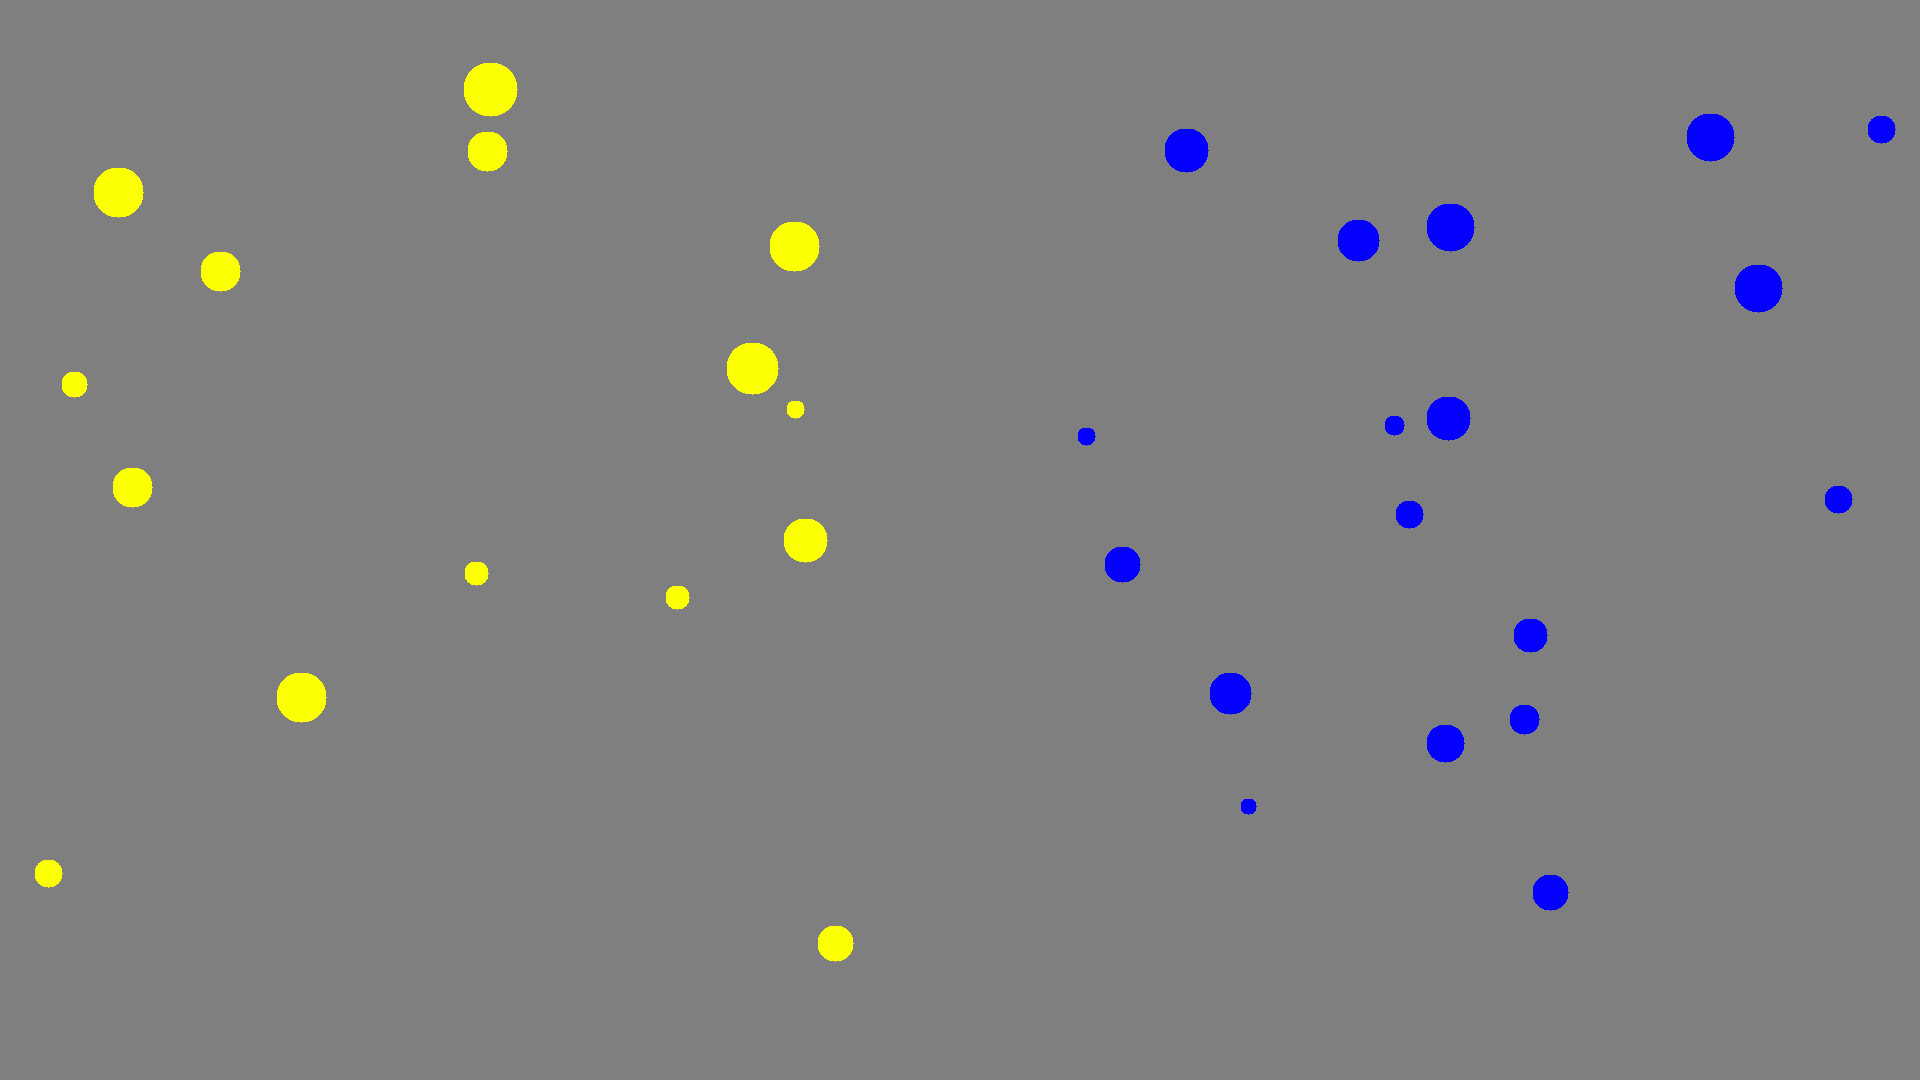

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/data/ans_15v18.png", width=640, height=360)

## Goals 
How are children exploring in an approximate number comparison task? 
- First, I examine children's performance in the task with summary statistics of their overall accuracy, response time, and switches between arrays.
- Then, I simulate data using the two models mentioned above and observe how behavior changes with different models. The goal is to determine whether the specified models are appropriate for answering the questions below. 
- Next, I fit the parameters and perform model comparison.
- <i>Hypothesis</i>: There will likely be wide variability in children's accuracy and frequency of switches between arrays and it is hypothesized that children explore often (i.e., they switch between the dot arrays often across trials, perhaps for about half of the trials or more). Of the two models presented, I expect that their exploration behavior is better described by the simple RL model. Since children receive trial-level feedback about the correctness of their response, they may use this information, perhaps coupled with their memory of the previous trial's stimulus cues or difficulty (though this "memory" is not measured here) to inform their subsequent choice.

How do children's bias for exploration or "rates of exploration"/learning rates relate to their approximate number comparison performance and math skills?
- I compute zero-order correlations between model-independent variables (e.g., accuracy) and children's math skills, and the free parameters from the better fitting model. 
- Then, I estimate hierarchial logistic regression models to predict children's accuracy on each trial of the task using the free parameter of the better fitting model, children's math abilities, and the interaction between the free parameter and children's math skills. The purpose is to examine whether exploration behaviors benefits some children (e.g., those with higher math skills) over others. 
- Additionally, I examine the relation between accuracy and other parameters that describe children's exploration behaviors at the trial-level (e.g., the frequency of switches between dot arrays). Again, the purpose is to examine whether the tendency to explore benefits some children over others.
- The models will control for ratio (task difficulty).
- <i>Hypothesis</i>:  Children who tend to explore more will be more accurate at dot comparison. I argue that when children visually explore the dot arrays, they pick up cues that help them determine which array is more numerous. Further, it is expected that this relation is driven by or is stronger for children with high math skills (e.g., the interaction between say, learning rate, and math is positive). Exploration may generally be more beneficial for the high (vs. low or average) math group because those children are picking up and using relevant numerical cues that help them discriminate between the arrays, whereas children in the other math groups are perhaps picking up irrelevant cues that they cannot suppress (e.g., due to low IC).




## Sections
There are 4 sections.

- _Section 1_ deals with the real data and provides a summary of children's performance on the dot comparison task and standardized math assessment, as well as their exploration vs. exploitation tendencies (i.e., switching behavior) across tasks. The purpose is to give a sense of the variability in young children's approximate number system or ANS acuity, math skills, and general exploration. 
- _Section 2_ is an exploration of the two learning models that will be fit, including the results of the data simulations using these models. The aim is to examine what dot comparison performance looks like in the context of each model and determine whether they are appropriate to compare.
- _Section 3_ shows the results of fitting the models to the data and comparing them. The goal is to find the "winning" model whose free parameter we'll examine further in the next section.
- _Section 4_ shows the results of the post-hoc analyses of children's dot comparison performance, exploration, and math skills. The purpose is to examine whether similar behavioral patterns can produce different results (i.e., task accuracy). 

<br>

## Metrics
The metrics of interest are the free parameters obtained from the models (i.e., bias and/or learning rate) and model-independent variables such as overall accuracy (proportion of correct trials), the proportion of trials spent exploring, and switching frequency in the dot comparison task. 

<br>

## The TED talk moment
Young children are curious agents who explore often, particularly when compared to adults, even at the cost of obtaining fewer rewards. Their tendency to frequently explore is advantageous as they are able to adapt quickly to a dynamic world (Sumner et al., 2019). The present project attempts to further specify the role of exploration and curosity in children's navigation of a complex task and asks (the big question): Given that children are generally explorative and that exploration can be beneficial, why do we see individual variability in their performance on a range of cognitive tasks (e.g., an approximate number comparison task)? How do the same or similar patterns of behavior result in different performance outcomes? Is exploration only beneficial for some children and if so, what differentiates these children?

## Install and import needed modules

### Import modules
Import what _you_ need

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from copy import deepcopy

import statsmodels.nonparametric.smoothers_lowess
from scipy.optimize import minimize
import scipy
import scipy.stats as stats
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf

!pip install pymer4
from pymer4.models import Lmer

from rpy2.robjects.packages import importr 

utils = importr('utils')
utils.install_packages('lme4') #thank goodness this exists


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for pymer4: filename=pymer4-0.7.3-py2.py3-none-any.whl size=57070 sha256=55e2b20ce311061d7fb6c1d59c8b3f06e519cb02376cadb6ecda78c3506085de
  Stored in directory: /root/.cache/pip/wheels/37/c8/7b/7bf57336889715e7fe4f6e48bed67b6f81730e2301ae7b6b88
Successfully built pymer4


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/minqa_1.2.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 53548 bytes (52 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f645f761410> [RTYPES.NILSXP]

### Config notebook
Please include this.

In [ ]:
# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Dev
%load_ext autoreload
%autoreload 2

**IMPORTANT !** Some of the code below was adapted from https://notebook.community/poldrack/jdm/reinforcement-learning/RL-fitting with guidance from Daw's (2009) paper on modeling trial-by-trial data, Huys' (2016) modeling tutorial, and Wilson and Collins' (2019) paper on modeling behavioral data (along with their code: https://github.com/AnneCollins/TenSimpleRulesModeling).

## Section 1 - A description of the real data
In this section, general summary statistics of children's performance on the approximate number (ANS) comparison and math assessments are displayed. Note the range of scores describing children's behavior and outcomes in the tasks.

In [ ]:
#for importing data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Variables and their descriptions:


*   **ID** - participant identifier
*   **trial_num** - trial number
*   **ratio** - ratio of the larger to smaller number of dots; index of trial difficulty where ratios closer to 1 reflect more difficult arrays to discriminate
*   **correct** - binary indicator of accuracy on each trial (correct=1)
*   **rt** - response time in seconds
*   **switches** - number of switches between dot arrays
*   **explore** - binary variable capturing whether children's switching behaviors were an instance of exploration or exploitation; we assume that children who view each array more than once are exploring (explore=1)
*   **math** - standardized math assessment score



In [ ]:
path = "/content/drive/MyDrive/data/PINK_ChildANS_Clean.csv"
df = pd.read_csv(path)

#view the data
view = df.head(10)
print("First 10 observations:")
print(view)

First 10 observations:
   ID  trial_num  ratio  correct        rt  switches  explore  math
0   1          1   1.17        0  1.496293         0        0   110
1   1          2   1.14        0  1.510225         0        0   110
2   1          3   2.00        0  0.931695         2        1   110
3   1          4   1.17        0  0.710100         1        0   110
4   1          5   1.14        0  0.836005         1        0   110
5   1          6   1.14        1  0.500179         1        0   110
6   1          7   1.50        1  0.436222         2        1   110
7   1          8   1.14        1  0.493070         2        1   110
8   1          9   2.00        0  0.483424         1        0   110
9   1         10   1.50        1  0.282250         3        1   110


I've imported trial-by-trial data, along with a trial-invariant variable, children's math assessment scores. I collapse these data and obtain some descriptives.

### Descriptives at the child-level

In [ ]:
aggy = df[['ID', 'correct', 'rt', 'switches', 'explore', 'math']].copy()
aggy = aggy.groupby('ID').mean()
aggy.agg(['mean','std', 'min', 'max', 'skew', 'kurtosis'])

,correct,rt,switches,explore,math
mean,0.673878,2.142426,1.403846,0.435897,112.115385
std,0.122122,0.690161,0.485047,0.189702,15.813439
min,0.416667,0.983134,0.055556,0.013889,77.000000
max,0.861111,4.578421,2.152778,0.805556,145.000000
skew,-0.344555,1.263278,-0.489722,-0.078165,0.366689
kurtosis,-0.877962,2.662801,-0.175611,-0.707409,-0.488215


Children's mean scores (proportion of correct trials) and response times on the dot comparison task, as well as their math assessment scores, show considerable variability. Note that the _switches_ variable represents the _average_ switch frequency between arrays per child. Across all trials (i.e., not grouped by child and not shown here), the greatest number of switches was 13. Interestingly, children's tendency to explore, as indexed by the proportion of trials in which they switch between the dot arrays more than once is diverse as well, ranging from .01 to .81. 

### Descriptives by task difficulty

ANS task difficulty is indexed by the ratio of the larger to smaller quantity of dots. Recall that in this task, ratios ranged from 1.14 to 2. Next, I examine descriptively, whether accuracy and switching behavior changes as a function of difficulty.



In [ ]:
aggy_diff = df[['ID', 'ratio', 'correct', 'rt', 'switches', 'explore']].copy()
aggy_diff = aggy_diff.groupby(['ID', 'ratio']).mean()
aggy_diff.groupby('ratio').agg(['mean','std'])

correct                  rt  ...  switches   explore          
           mean       std      mean  ...       std      mean       std
ratio                                ...                              
1.14   0.631410  0.140472  2.337732  ...  0.540257  0.427350  0.203913
1.17   0.571581  0.134444  2.126238  ...  0.544599  0.445513  0.226935
1.50   0.717949  0.157460  2.083745  ...  0.504725  0.438034  0.195152
2.00   0.774573  0.190685  2.021988  ...  0.523069  0.432692  0.213992

[4 rows x 8 columns]

As expected, children's ANS task accuracy generally increases and RT decreases as task difficulty decreases. Interestingly, children's average switching frequency and the proportion of trials in which they are considered to be exploring stays relatively constant across difficulty. Even on easier trials, i.e., when the difference between the arrays is more pronounced and it is expected that less visual scanning of the stimuli is needed compared to harder trials, children still explore with similar relative frequency on average. However, since this is aggregate data, it is unknown whether children are exploring consistently across ratio bins.

Now that I have general idea of how children are behaving in this task, I move onto specifying the models that describe children's exploration behavior.

## Section 2 - Model specification and data simulation
In this section, I put my real data aside for a couple of sections and describe the two models of exploration strategy, as well as how their free parameters map onto children's behavior in the ANS task. For each model, I will simulate fake data to show what dot comparison performance looks like.

### Random exploration

The first strategy of interest is random responding or exploration, in which children are assumed to choose between exploring and exploiting at random. I include this as a simple model of behavior because it is possible that children had trouble engaging with the task or that this was their best way of approaching it. As mentioned previously, since children are generally curious beings, they may have a bias for exploring over exploiting, and I attempt to capture this preference for one choice over the other in the free parameter, $b$.











In [ ]:
#define a function that helps make a choice based on some given probabilities
def choose(p):
  a =(np.nonzero([-2^(-52), np.sum(p)]) < np.random.normal(0,1,1)) 
  a = np.max(a.astype(int))
  return a

In [ ]:
df = pd.DataFrame(columns=('trial_num', 'explore', 'correct')) #df for simulated data, one participant doing 72 trials of the task
df_all = pd.DataFrame(columns=('id', 'explore_prop', 'correct_prop')) #df for simulated data of multiple participants
dist = pd.DataFrame(columns=('b_value', 'mean_explore_prop', 'mean_accuracy_prop')) #df for distribution of values from all simulated data

def sim_random_repeated(T, ids, n): #function for multiple participants doing T trials, for different values of b

#T = number of trials
#ids = number of participants
#n = number of steps for b (bias), e.g., 11 gives 0, .1, .2, ..., 1

  dist_rand = dist.copy() #make copy for distributions
  df_all_rand = df_all.copy() #make copy for all sims

  for i in np.linspace(0,1,n): #repeat simulations for different values of bias

    df_rand = df.copy() #make copy for random exploration model

    b = i

    for x in range(ids): #x similations for number of participants

      for t in range(T): #one simulation for a given value of b (one participant)
        p = [b, 1-b] #compute choice probabilities based on given b
        e = choose(p) 

        #generate accuracy 
        m = random.choice([[0,1], [1,0]]) #array containing "reward probabilities" which is accuracy in this case
        if m[e] > np.random.normal(0,1,1):
          a=1
        else:
          a=0

        df_rand.loc[t] = [t, e, a]
      
      #store in df
      explore_score = df_rand["explore"]
      accuracy_score = df_rand["correct"]

      #print(d_rand) #for testing

      #calculate average
      explore_prop = np.mean(explore_score) 
      accuracy_prop = np.mean(accuracy_score)

    ep = explore_prop
    ap = accuracy_prop
    
    df_all_rand.loc[x] = [x, ep, ap]

    explore_prop = df_all_rand["explore_prop"]
    accuracy_prop = df_all_rand["correct_prop"]

    #print("Proportion of trials spent exploring:", explore_prop) #for testing
    #print("Proportion of correct trials:", accuracy_prop) #for testing

    #plot
    plt.figure(t)
    df_rand.plot(x ='trial_num', y='explore', kind = 'line', legend=None) 
    plt.close("all") #hide plots

    #calculate average
    mean_explore_prop = np.mean(explore_prop) 
    mean_accuracy_prop = np.mean(accuracy_prop)

    mep = mean_explore_prop
    map = mean_accuracy_prop

    dist_rand.loc[i] = [i, mep, map]
  
  #store in df
  mep = dist_rand["mean_explore_prop"]
  map = dist_rand["mean_accuracy_prop"]

  #print(dist_rand) #for testing

  #select a simulation example to plot
  #selection = random.randint(1,n)
  #plt.figure(selection)
  plt.figure(8)
  df_rand.plot(x ='trial_num', y='explore', kind = 'line', legend=None) 
  plt.xlabel('Trial number')
  plt.ylabel('Explore (1=yes, 0=no)')
  plt.title('Simulated behavior example (b = .7)')

  #plot distribution of exploration as a function of b
  #dist_rand.hist(column='explore_prop')
  #plt.xlabel('Proportion of trials spent exploring')
  #plt.title(None)

  dist_rand.plot(x ='b_value', y='mean_explore_prop', kind = 'line', legend=None)
  plt.xlabel('Bias value')
  plt.ylabel('Mean prop. of trials spent exploring')
  plt.title(None)

  #explore_prop_mean = np.mean(ep) 
  #print("Mean prop. of trials spent exploring across sims:", explore_prop_mean)
    
  #plot distribution of accuracy data
  #dist_rand.hist(column='accuracy_prop')
  #plt.xlabel('Proportion of correct trials')
  #plt.title(None)

  dist_rand.plot(x ='b_value', y='mean_accuracy_prop', kind = 'line', legend=None)
  plt.xlabel('Bias value')
  plt.ylabel('Mean prop. of correct trials')
  plt.title(None)

  #accuracy_prop_mean = np.mean(ap)
  #print("Mean prop. of correct trials across sims:", accuracy_prop_mean)

Here, I simulate data of 52 "participants" completing 72 trials of the task and repeat this process for a range of bias values, $b$ = 0, .1, .2, ..., 1, to examine how behavior differs by having a slight preference for exploration over exploitation. Then, I plot one example from one "participant," and show the mean proportion of trials spent exploring and mean proportion of correct trials (across the 72 simulations) as a function of bias.

<Figure size 432x288 with 0 Axes>

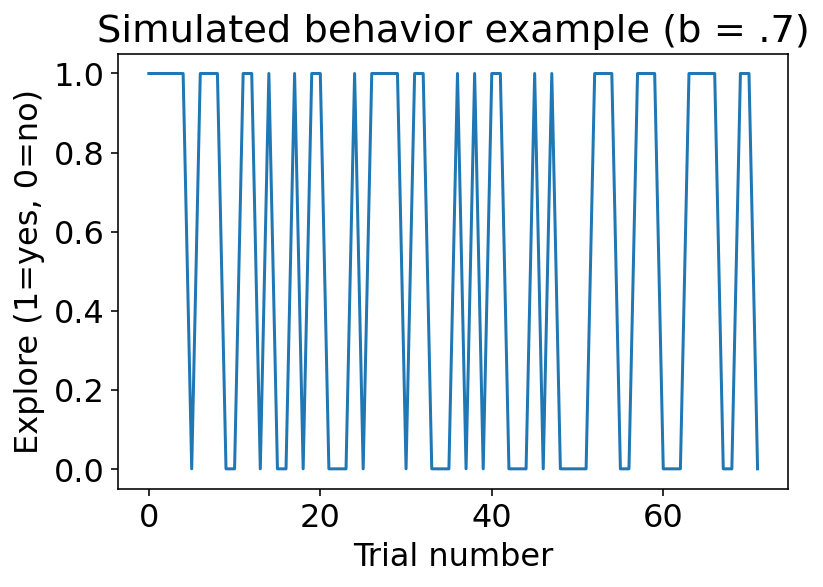

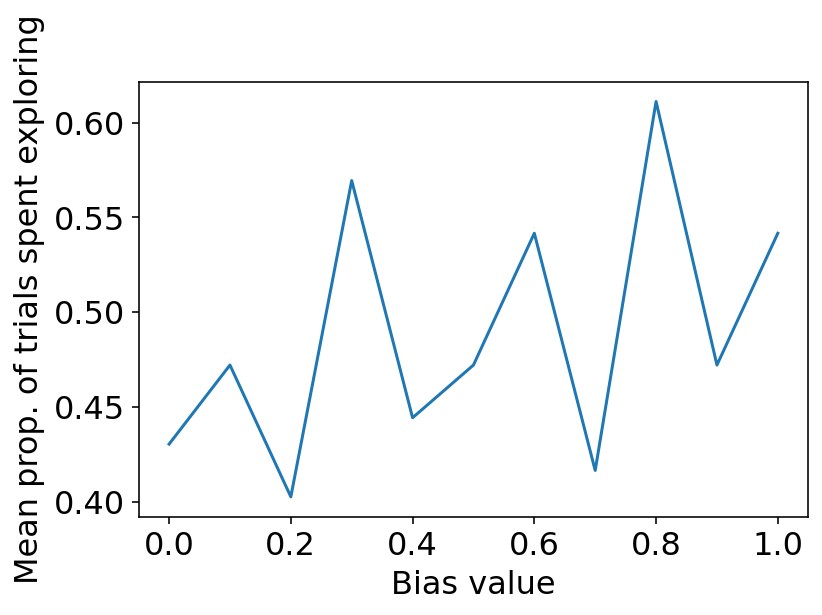

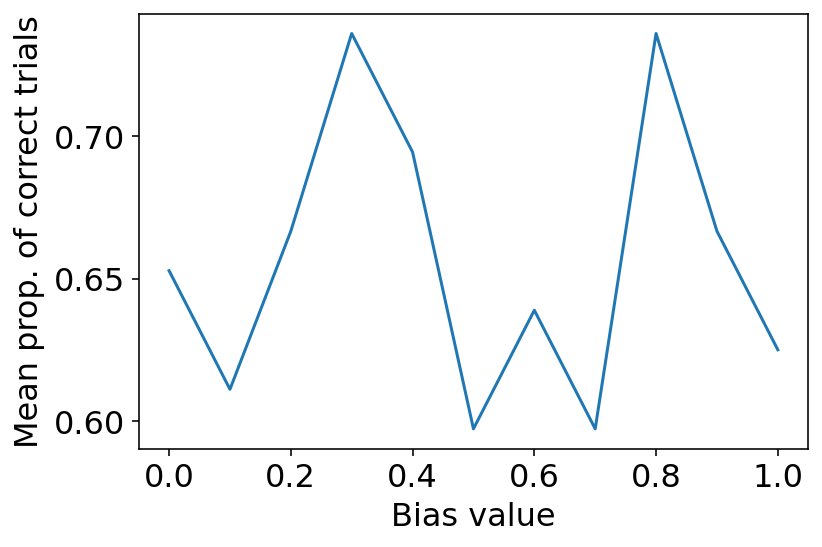

In [ ]:
sim_random_repeated(72, 52, 11)

Generally, the mean proportion of trials spent exploring oscillates around .5 and increases slightly with bias value. Sometimes, having a bias for exploration ($b$ > .5) results in slightly more exploration across trials. Note that this is proportion score is an average across 52 simulations, so there were simulations that produced values greater than or less than the points plotted here. Also, the mean proportion of correct trials on each iteration of the task generally increases with bias. Performance on this task in these simulations produces values close to the average proportion of trials spent exploring (_M_ = .44) and accuracy in the real data (_M_ = .67). It also shows that exporing more often on average does not necessarily result in better accuracy. Overall, I take these results to show that this random model is appropriate for describing the real data.

### Simple RL with Q-Learning

The next model of interest assumes that children's choice to explore or exploit on each trial is informed by the value of exploring given their current state. The free parameter in this model is a learning rate $\alpha$. This may map onto the extent to which children adjust their exploration behavior across trials. Relatively high learning rates indicate that children converge to a behavioral choice quickly. Temperature is fixed to keep things simple.


In [ ]:
df = pd.DataFrame(columns=('trial_num', 'explore', 'correct')) #dataframe for simulated data
df_all = pd.DataFrame(columns=('id', 'explore_prop', 'correct_prop')) #df for simulated data of multiple participants
dist = pd.DataFrame(columns=('alpha_val', 'mean_explore_prop', 'mean_accuracy_prop')) #dataframe for distribution of values from simulated data


#import seaborn as sns
#sns.regplot(x='balance', y='default', data=data, logistic=True)

def sim_RL_repeated(T, beta, ids, n):

#T = number of trials
#alpha = learning rate
#beta = temperature (keep fixed)
#ids = number of participants
#n = number of steps for alpha, e.g., 11 gives 0, .1, .2, ..., 1

  df_RL = df.copy() #make copy for RL data
  df_all_RL = df_all.copy() #make copy for all sims
  dist_RL = dist.copy() #make copy for distributions

  Q = np.zeros((3,3))

  for i in np.linspace(0,1,n): #repeat simulations for different values of alpha

    alpha = i

    for x in range(ids): #repeat simulations for x number of participants

      for t in range(T): #one simulation for 72 trials (one participant)

        s = np.random.randint(2)

        p = np.exp(beta * Q[...,s]) 
        p = p/sum(p)

        a = choose(p) 

        r = 0

        switch = s #determine reward
        if switch == 0:
          if a == 0:
            r = 1
          else:
            r = 0

        elif switch == 0:
          if a == 0:
            r = 1
          else:
            r = 0

        elif switch == 2:
          if a == 2:
            r = 1
          else:
            r = 0
        

        #Q[a,s] = value of taking action a in state s
        Q[a,s] = Q[a, s] + alpha * (r - Q[a,s]) #update Q for next trial

        #save to dataframe
        df_RL.loc[t] = [t, a, r]
        
      #store in dataframe
      explore_score = df_RL["explore"]
      accuracy_score = df_RL["correct"]

      #print(df_RL) #for testing

      #calculate average
      explore_prop = np.mean(explore_score) 
      accuracy_prop = np.mean(accuracy_score)

      #print("Proportion of trials spent exploring:", explore_prop)
      #print("Proportion of correct trials:", accuracy_prop)

      #plot
      plt.figure(t)
      df_RL.plot(x ='trial_num', y='explore', kind = 'line', legend=None) 
      plt.close("all") #hide plots

      ep = explore_prop
      ap = accuracy_prop

    df_all_RL.loc[x] = [x, ep, ap]

    explore_prop = df_all_RL["explore_prop"]
    accuracy_prop = df_all_RL["correct_prop"]

    mean_explore_prop = np.mean(explore_prop)
    mean_accuracy_prop = np.mean(accuracy_prop)

    mep = mean_explore_prop
    map = mean_accuracy_prop

    dist_RL.loc[i] = [i, mep, map]
  
  #store in dataframe
  mep = dist_RL["mean_explore_prop"]
  map = dist_RL["mean_accuracy_prop"]

  #print(dist_RL) #for testing

  #randomly select one simulation example to plot
  plt.figure(random.randint(1,100))
  df_RL.plot(x ='trial_num', y='explore', kind = 'line', legend=None) 
  plt.xlabel('Trial number')
  plt.ylabel('Explore (1=yes, 0=no)')
  plt.title('Simulated behavior example')

  #plot distribution of exploration data
  #dist_RL.hist(column='explore_prop')
  #plt.xlabel('Proportion of trials spent exploring')
  #plt.title(None)

  dist_RL.plot(x ='alpha_val', y='mean_explore_prop', kind = 'line', legend=None)
  plt.xlabel('Learning rate (alpha)')
  plt.ylabel('Mean prop. of trials spent exploring')
  plt.title(None)

  #explore_prop_mean = np.mean(ep) 
  #print("Mean prop. of trials spent exploring across sims:", explore_prop_mean)
    
  #plot distribution of accuracy data
  #dist_RL.hist(column='accuracy_prop')
  #plt.xlabel('Proportion of correct trials')
  #plt.title(None)

  dist_RL.plot(x ='alpha_val', y='mean_accuracy_prop', kind = 'line', legend=None)
  plt.xlabel('Learning rate (alpha)')
  plt.ylabel('Mean prop. of correct trials')
  plt.title(None)

  #accuracy_prop_mean = np.mean(ap)
  #print("Mean prop. of correct trials across sims:", accuracy_prop_mean)


<Figure size 432x288 with 0 Axes>

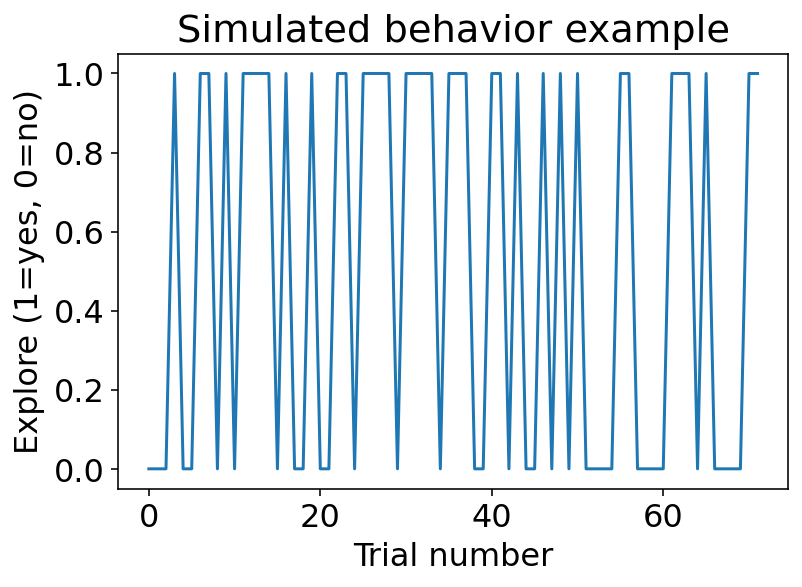

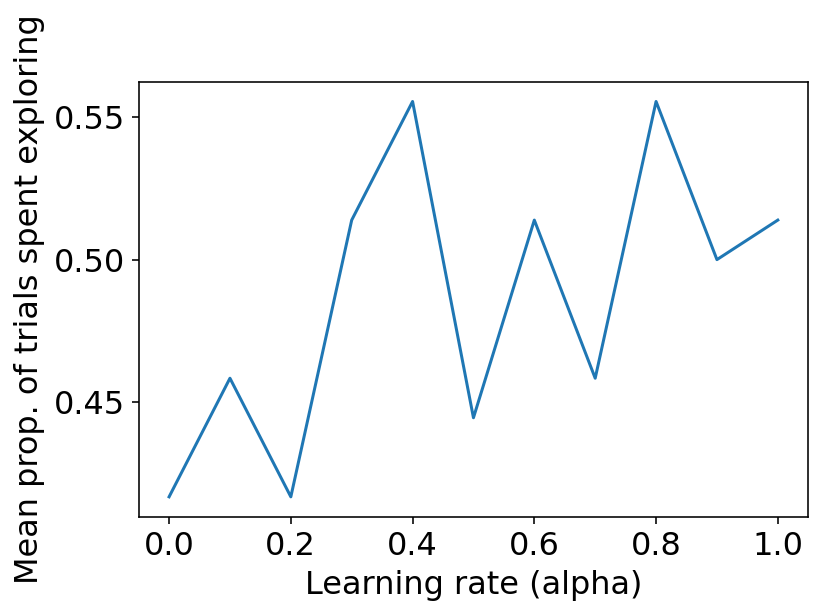

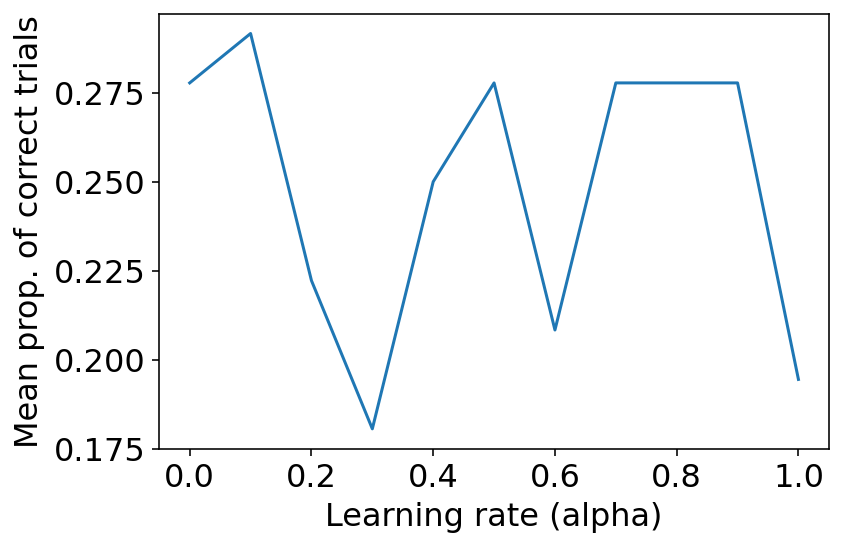

In [ ]:
sim_RL_repeated(72, 1, 52, 11) #52 simulations of 72 trials each

The relation between the mean proportion of trials spent exploring and the learning rate is less clear here, but it appears that greater learning rates produce slightly more exploratory behavior on average. Also, the mean proportion of correct trials fluctuates as a function of learning rate and is lower than the minimum accuracy score in the real data. Given that the task parameters comprise of relatively small values (e.g., 52 simulations of 72 trials were computed just to match the real data), I run these simulations again to examine whether these behavior metrics change drastically.

<Figure size 432x288 with 0 Axes>

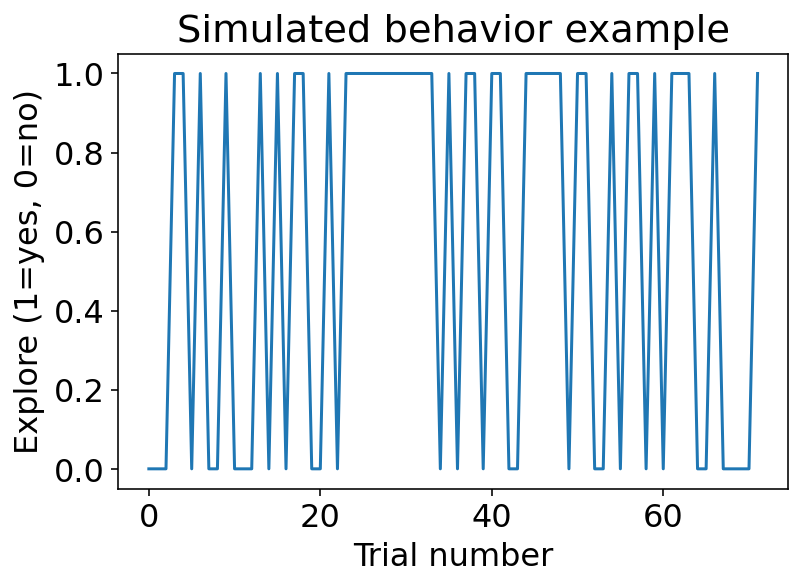

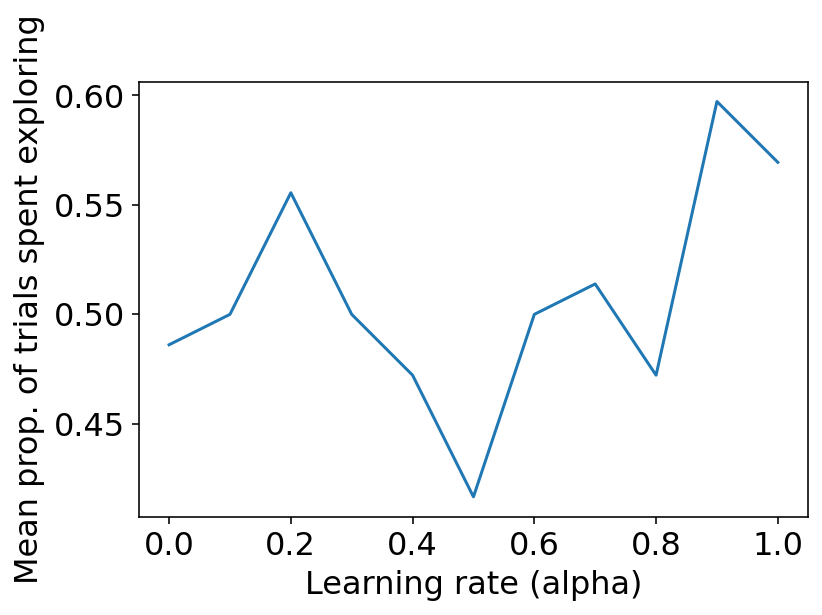

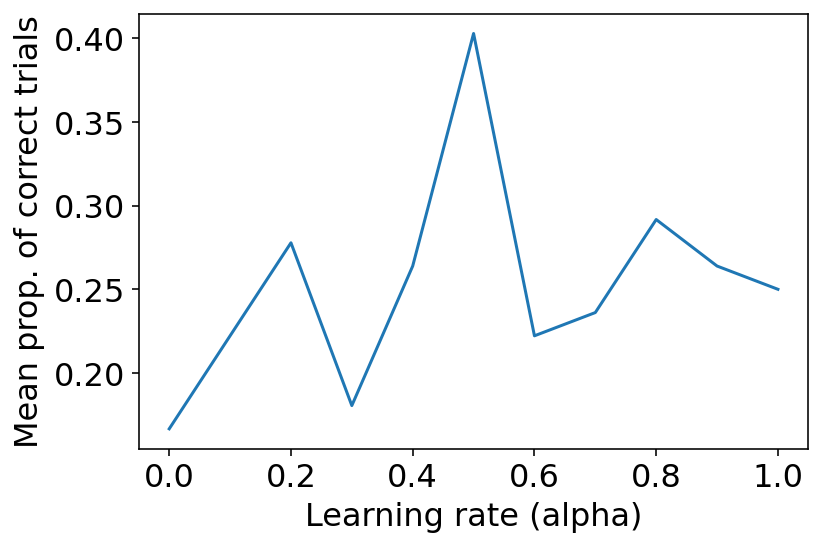

In [ ]:
#same parameters
sim_RL_repeated(72, 1, 52, 11) 

<Figure size 432x288 with 0 Axes>

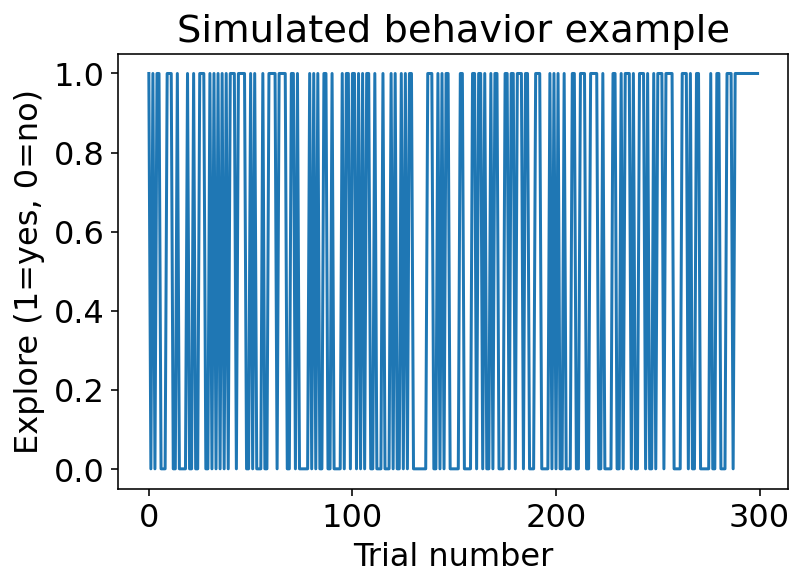

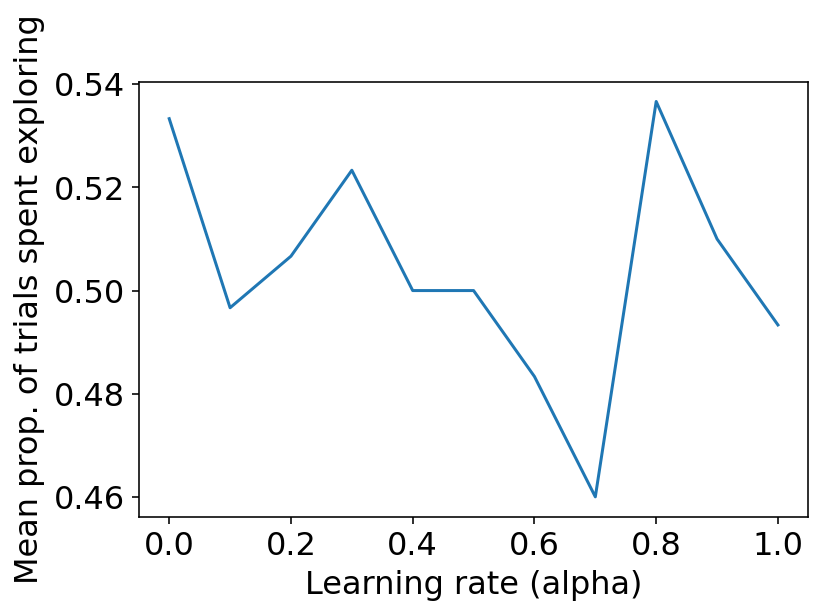

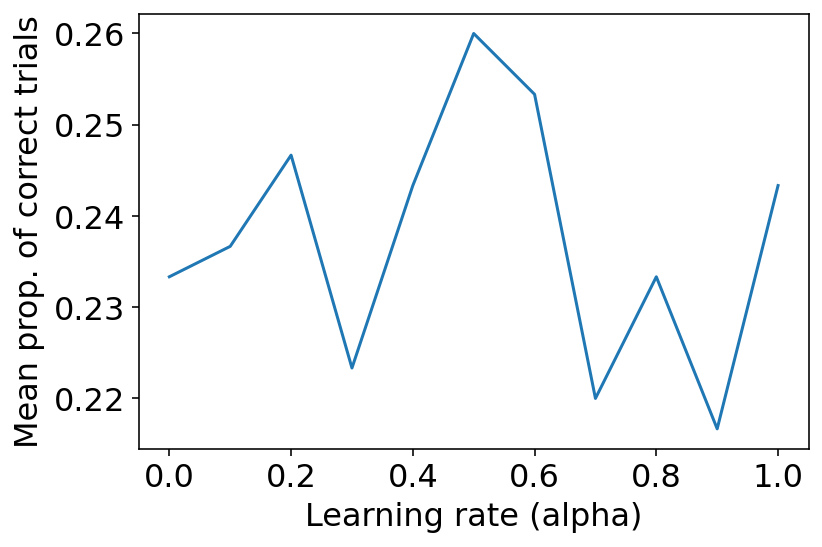

In [ ]:
#increase trial number and simulation values
sim_RL_repeated(300, 1, 300, 11) #300 simulations of 300 trials each

Again, it appears that there is no straightforward relation between the mean proportion of trials spent exploring, the proportion of correct trials, and learning rates. The mean proportion of trials spent exploring parallels the values present in the real data. Also, although the mean proportion of correct trials takes on values that are less than what is observed in the data, these aren't implausible values. The plots show the average accuracy across simulations and as mentioned previously, some simulations produced greater values than what is shown here. Overall, I take these results to mean that the RL model specified is appropriate for describing children's behavior in the approximate number comparison task. Next, I attempt to fit the parameters.

## Section 3 - Model fitting and comparison

In this section, I estimate the values of the parameters that best describe the data, using a maximum-likelihood approach, with code adapted from Wilson and Collins' (2019) paper (again, code can be found here: https://github.com/AnneCollins/TenSimpleRulesModeling). 

Then, I compute the Bayes Information Criterion (BIC) to be used in model comparison. The BIC is calculated with the log likelihood value at the best fitting parameter settings and the number of parameters in the model, which is a penalty term (i.e., model complexity is penalized).

## Random model

In [ ]:
#import real data again 
path = "/content/drive/MyDrive/data/PINK_ChildANS_Clean.csv"
df = pd.read_csv(path)

In [ ]:
#likelihood function 
def lik_rand(a, b):
#a = actual choice on a given trial; to explore or not? this should come from the real data
#b = choice probability/bias for exploring

  for t in range(len(a)):
    p = [b, 1-b] #compute choice probabilities
    choiceProb = p[a[t]] #compute choice probability for actual choice

  NegLL = -np.sum(np.log(choiceProb)) #compute negative log-likelihood
  
  #ISSUE - for some reason the sum of the choice probabilities is 0.. and p is always 1?

  return NegLL #remember to return!!!

#estimation
def ml_est_rand(): 

  obFunc = lambda x: lik_rand(a, x); #obFunc only applies to x in the likelihood function 
  
  x0 = np.random.uniform(0,1,1)

  #returns the parameter that minimizes the function; it should return the bias value
  result = scipy.optimize.minimize(obFunc, x0, bounds=[[0,1]])
  if result['success']:
    return result['x']
  else:
    return [np.nan] 

In [ ]:
df_list = []
ids = list(range(1, 56)) #participant IDs go up to 55
ids.pop(6) #remove 7 since that participant number doesn't exist in the dataset
ids.pop(14) #remove 16
ids.pop(33) #remove 36

for p in range(len(ids)):
    dfx = df[df['ID'] == ids[p]] 
    df_list.append(dfx)

df_new = df[['ID', 'correct', 'rt', 'switches', 'explore','math']].copy()
df_new = df_new.groupby('ID').mean()
df_new["bias_est"] = ""

est_list = [] #to store bias estimates
bic_list = [] #to store BIC values

nanctr = 0

for i in range(len(df_list)): #repeat for every dataset (each participant)
  a = df_list[i]["explore"].to_numpy()
  a = a.astype(int)

  mle=ml_est_rand() #get bias estimate 
  if np.isnan(mle[0]):
    nanctr +=1
  est=mle 

  est_list.append(est)

  NegLL = lik_rand(a, est) 
  
  #print(NegLL) #for troubleshooting

  k = 1 #number of parameters in model
  BIC = k * np.log(len(a)) + -2*NegLL #BIC calculation
  #print(BIC)
  bic_list.append(BIC)
  
est_list_make = np.concatenate(est_list,0) #unlist; concatenate along axis=0 
#use if bias estimates are needed

bic_mean = np.mean(bic_list)
print("Average BIC:", bic_mean)


Average BIC: 4.276666119016055


### A suspicious BIC value...

This BIC of 4.28 seems suspiciously low, so I do some troubleshooting to figure out what went wrong. After viewing some of the parameters from the code above, I discover that the negative log likelihood, which is used to estimate the BIC, is essentially 0. I suspect that the random model has been misspecified and/or there is a bug in the code.

Update: I repeated the model specification steps, but I could not find the source of my error. For the sake of time, I moved onto fitting the simple RL model and returned to the random model in later.

In [ ]:
#just showing the negative log likelihood being unreasonable
print(NegLL)

-0.0


## Simple RL with Q-learning

In [ ]:
#insert real data again
path = "/content/drive/MyDrive/data/PINK_ChildANS_Clean.csv"
df = pd.read_csv(path)

In [ ]:
#useful functions from notebook

#using a minimization routine; we return the negative log likelihood 
def q_negloglike(params):
    lr=params[0]
    if len(params)>1:
        temp_t=params[1]
    else:
        temp_t=1
        
    assert resp.shape[0]==reward.shape[0]
    #print(resp)
    #print(reward)
    
    q=[0.0,0,0]
    ll_sum=0
    
    for i in range(resp.shape[0]): # log of choice probability (from Daw): β · Qt(ct) − log(exp(β · Qt(L)) + exp(β · Qt(R)))
      ll_sum+=temp_t*q[int(resp[i])] - np.log(np.exp(q[0]*temp_t)+np.exp(q[1]*temp_t)) 
      q[int(resp[i])]=q[int(resp[i])] + lr*(reward[i]-q[int(resp[i])])
    return -1*ll_sum #returns the neg log likelihood


#function to perform maximum likelihood estimation 
def ml_est(start=None):
    if not start:
        start=[1e-3]
    result=minimize(q_negloglike,start,bounds=[[0,1]]) #neg LL is used to find minimum

    if result['success']:
        return result['x']
    else:
        return [np.nan]

In [ ]:
#let's say each participant has their own little dataset containing 72 trials of the task
#run the estimation function for each dataset and estimate learning rates
#add these estimations to the dataset


df_list = [] #to store list a df for each participant
ids = list(range(1, 56)) #participant IDs go up to 55
ids.pop(6) #remove 7 since that participant number doesn't exist in the dataset
ids.pop(14) #remove 16
ids.pop(33) #remove 36



for p in range(len(ids)):
    dfx = df[df['ID'] == ids[p]] 
    df_list.append(dfx)

df_new = df[['ID', 'correct', 'rt', 'switches', 'explore','math']].copy()
df_new = df_new.groupby('ID').mean()
df_new["learn_rate_est"] = ""

#print(df_new) #for testing

est_list = [] #to store learning rate estimates
bic_list = [] #to store BIC values

nanctr = 0

for i in range(len(df_list)): #get the learning rate estimate for each participant
  resp = df_list[i]["explore"].to_numpy() 
  reward = df_list[i]["correct"].to_numpy()

  mle=ml_est() #compute the learning rate estimate
  if np.isnan(mle[0]):
    #print(nanctr)
    nanctr+=1
  est=mle 
  
  est_list.append(est) #append learning rates 

  bic = q_negloglike([est, 1]) 
  bic_list.append(bic)



est_list_make = np.concatenate(est_list,0) #unlist; concatenate along axis=0
bic_list_make = np.concatenate(bic_list,0)

df_new['learn_rate_est'] = est_list_make #add to df
df_new['bic_val'] = bic_list_make #add to df

#print(df_new) #for testing

#compute average BIC
bic_mean = np.mean(bic_list_make)
print("Average BIC:", bic_mean)

Average BIC: 47.58572586943301


### Returning to the random model...

I was unable to fix the log likelihood calculation issue above, which affects the participant-level bias estimates (see below).

In [ ]:
#estimating bias values

#reusing code from above
df_list = []
ids = list(range(1, 56)) #participant IDs go up to 55
ids.pop(6) #remove 7 since that participant number doesn't exist in the dataset
ids.pop(14) #remove 16
ids.pop(33) #remove 36

for p in range(len(ids)):
    dfx = df[df['ID'] == ids[p]] 
    df_list.append(dfx)

df_new = df[['ID', 'correct', 'rt', 'switches', 'explore','math']].copy()
df_new = df_new.groupby('ID').mean()
df_new["bias_est"] = ""

est_list = [] #to store bias estimates

nanctr = 0

for i in range(len(df_list)): #repeat for every dataset (each participant)
  a = df_list[i]["explore"].to_numpy()
  a = a.astype(int)

  mle=ml_est_rand() #get bias estimate 
  if np.isnan(mle[0]):
    nanctr +=1
  est=mle 

  est_list.append(est)

  
est_list_make = np.concatenate(est_list,0) #unlist; concatenate along axis=0 
#use if bias estimates are needed

df_new['bias_est'] = est_list_make #add to df

print(df_new.head(10))

     correct        rt  switches   explore   math  bias_est
ID                                                         
1   0.527778  1.054337  1.375000  0.416667  110.0       0.0
2   0.694444  2.048918  2.111111  0.458333  103.0       1.0
3   0.777778  1.697269  1.875000  0.666667  109.0       1.0
4   0.861111  2.736158  2.125000  0.805556  137.0       1.0
5   0.722222  1.757432  0.055556  0.013889  123.0       1.0
6   0.486111  1.788530  1.097222  0.236111   89.0       0.0
8   0.680556  1.934813  1.805556  0.611111  145.0       0.0
9   0.791667  2.335943  1.527778  0.472222  107.0       1.0
10  0.666667  3.471944  1.847222  0.597222   95.0       0.0
11  0.486111  1.585702  1.958333  0.583333  115.0       0.0


It is nonsensical that all of the participant-level bias estimates are either 0 or 1 because this suggests that children are either just exploring or exploiting. Below, I attempt to justify my decision to move forward with the RL model.

## Model comparison (sort of)

After failing to remedy the issue with the random model, I think about how I want to spend the rest of my time on this project. I decide that it would be useful for me continue working on the post-hoc analyses. While this is not a good science practice*, I have learned a lot from completing this project up to this point and I would like to keep going. 

Also, as mentioned in the introduction, children recieved trial-level feedback about their accuracy on the task and I expect that (at least some) children are using this information to quickly update their beliefs about whether to explore next. For instance, they may choose to visually explore the arrays on a subsequent trial if they explored previously and were correct. I believe that if children did not receive accuracy feedback, they would be more likely to explore randomly. While I cannot directly compare the two exploration strategies, I move onto post-hoc analyses using the free parameter from the RL model so that I can practice analyzing and interpreting these data.

_*Along with the fact that I did not complete other critical modeling steps like checking to see that my parameters are recoverable. If I started this project earlier, I might have been able to do this._

## Section 4 - Post-hoc analyses

Next, I compute learning rate estimates for each participant and correlate this parameter with other variables, including overall task accuracy and math skills. Then, I estimate some regression models to learn more about how the "exploration behavior" (e.g., frequency of switches) variables relate to time and children's accuracy on the task.

In [ ]:
#Reuse code from above to extract estimates

df_list = []
ids = list(range(1, 56)) #participant IDs go up to 55
ids.pop(6) #remove 7 since that participant number doesn't exist in the dataset
ids.pop(14) #remove 16
ids.pop(33) #remove 36

for p in range(len(ids)):
    dfx = df[df['ID'] == ids[p]] 
    df_list.append(dfx)

df_new = df[['ID', 'correct', 'rt', 'switches', 'explore','math']].copy()
df_new = df_new.groupby('ID').mean()
df_new["learn_rate_est"] = ""

#print(df_new) #for testing

est_list = [] #to store learning rate estimates

nanctr = 0

for i in range(len(df_list)): #get the learning rate estimate for each participant
  resp = df_list[i]["explore"].to_numpy() 
  reward = df_list[i]["correct"].to_numpy()

  mle=ml_est() #compute the learning rate estimate
  if np.isnan(mle[0]):
    #print(nanctr)
    nanctr+=1
  est=mle 
  
  est_list.append(est) #append learning rates 

est_list_make = np.concatenate(est_list,0) #unlist; concatenate along axis=0

df_new['learn_rate_est'] = est_list_make #add to df

Let's view the dataset (aggregated from the trial-by-trial data we imported at the very beginning) that we'll be working with below. Here are the variable descriptions:

- **correct** = proportion of correct trials <br>
- **rt** = average response time across trials <br>
- **switches** = average number of switches between dot arrays <br>
- **explore** = average proportion of trials spent exploring (defined here as switching between the arrays more than once) <br>
- **math** = standardized math assessment score <br>
- **learn_rate_est** = learning rate estimate

In [ ]:
print(df_new.head(10))

     correct        rt  switches   explore   math  learn_rate_est
ID                                                               
1   0.527778  1.054337  1.375000  0.416667  110.0        0.000000
2   0.694444  2.048918  2.111111  0.458333  103.0        0.111239
3   0.777778  1.697269  1.875000  0.666667  109.0        0.131424
4   0.861111  2.736158  2.125000  0.805556  137.0        0.073973
5   0.722222  1.757432  0.055556  0.013889  123.0        0.463127
6   0.486111  1.788530  1.097222  0.236111   89.0        0.073035
8   0.680556  1.934813  1.805556  0.611111  145.0        0.636833
9   0.791667  2.335943  1.527778  0.472222  107.0        0.000000
10  0.666667  3.471944  1.847222  0.597222   95.0        0.007968
11  0.486111  1.585702  1.958333  0.583333  115.0        0.218781


### Summary statistics and zero-order correlations

Next, I obtain some summary statistics about the learning rate estimates and run correlations between this parameter and the other variables in the dataset, such as overall accuracy and math skills. 

Recall that I interpret the learning rate as the extent to which participants update their beliefs and exploration behavior in response to trial-level feedback.

In [ ]:
#mean, sd, min, and max of learning rate estimates
df_new_lr = df_new["learn_rate_est"]
df_new_lr.agg(['mean','std', 'min', 'max'])

mean    0.197383
std     0.282105
min     0.000000
max     1.000000
Name: learn_rate_est, dtype: float64

                 correct  switches   explore      math  learn_rate_est
correct         1.000000  0.369645  0.431289  0.361414       -0.042209
switches        0.369645  1.000000  0.950442  0.116333       -0.214599
explore         0.431289  0.950442  1.000000  0.162381       -0.236314
math            0.361414  0.116333  0.162381  1.000000        0.115389
learn_rate_est -0.042209 -0.214599 -0.236314  0.115389        1.000000


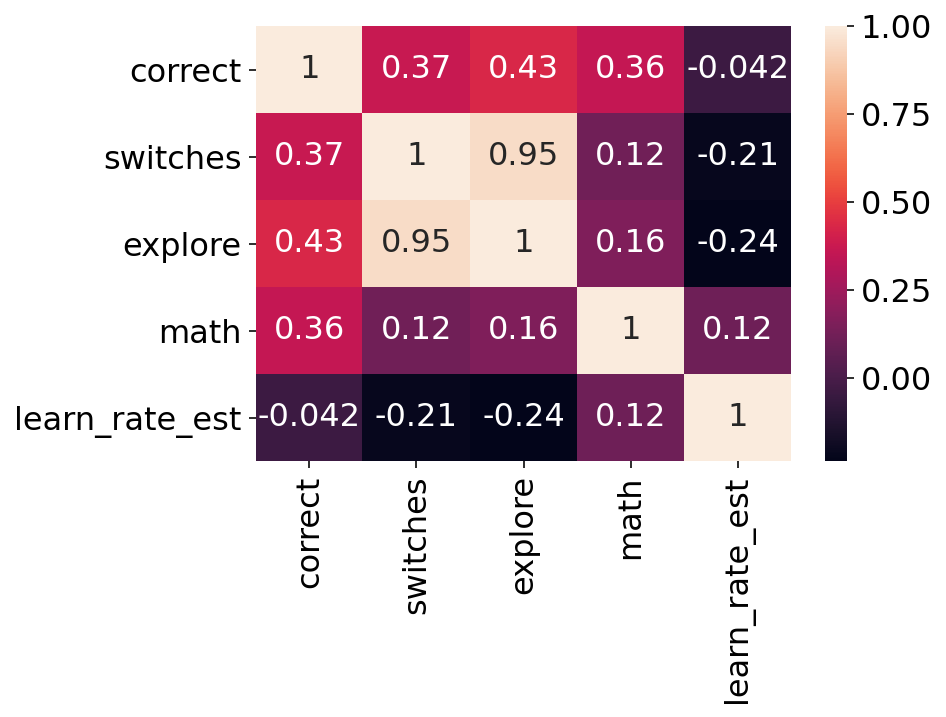

Corr tests for:
Switches and overall accuracy: r= 0.36964458536742206 p= 0.006996687295263708
Switches and prop. of trials exploring: r= 0.9504419276486733 p= 5.042600547183237e-27
Switches and learning rate estimates: r= -0.21459865010882798 p= 0.12657832352806564
Prop. of trials exploring and overall accuracy: r= 0.4312892760228333 p= 0.001412222245172526
Overall accuracy and math skills: r= 0.36141427796191977 p= 0.008476424390032957


In [ ]:
#correlations among variables of interest
df_corr = df_new[["correct", "switches", "explore", "math", "learn_rate_est"]]
#np.corrcoef(df_new["correct"], df_new["math"])[1][0]
corrMatrix = df_corr.corr()
print(corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.show()

#corr tests for select values
print("Corr tests for:")
corr = scipy.stats.pearsonr(df_corr["switches"], df_corr["correct"])
print("Switches and overall accuracy: r=", corr[0], "p=", corr[1])

corr = scipy.stats.pearsonr(df_corr["switches"], df_corr["explore"])
print("Switches and prop. of trials exploring: r=", corr[0], "p=", corr[1])

corr = scipy.stats.pearsonr(df_corr["switches"], df_corr["learn_rate_est"])
print("Switches and learning rate estimates: r=", corr[0], "p=", corr[1])

corr = scipy.stats.pearsonr(df_corr["explore"], df_corr["correct"])
print("Prop. of trials exploring and overall accuracy: r=", corr[0], "p=", corr[1])

corr = scipy.stats.pearsonr(df_corr["correct"], df_corr["math"])
print("Overall accuracy and math skills: r=", corr[0], "p=", corr[1])

Child-level learning rates are not correlated with overall accuracy, the average frequency of switches between arrays, or the proportion of trials spent exploring. Overall task accuracy is positively correlated with the mean frequency of switches, the proportion of trials spent exploring, and math skills (though these correlations are "moderate"). I plot a couple of these correlations below. This is important given that there are only 52 observations which contributes to the impreciseness of these estimates.

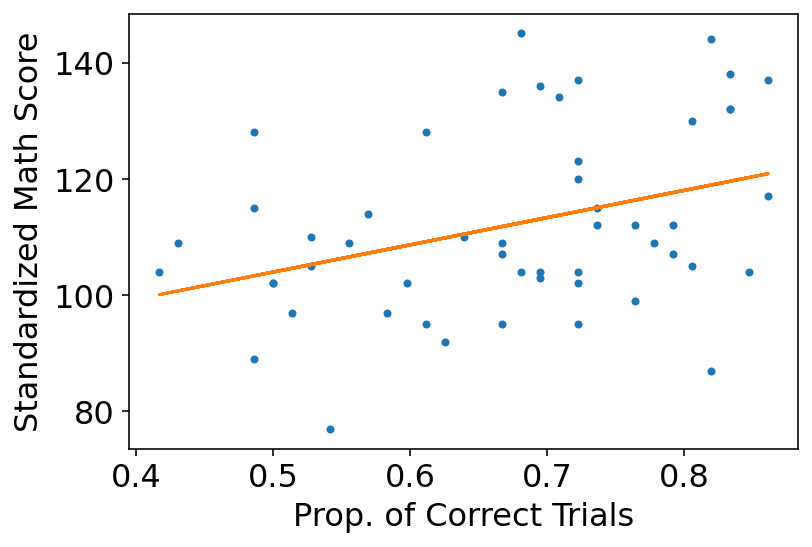

In [ ]:
from numpy.polynomial.polynomial import polyfit

#correlation between dot comparison accuracy and math skills
x = df_corr["correct"]
y = df_corr["math"]

b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.xlabel("Prop. of Correct Trials")
plt.ylabel("Standardized Math Score")
plt.show()

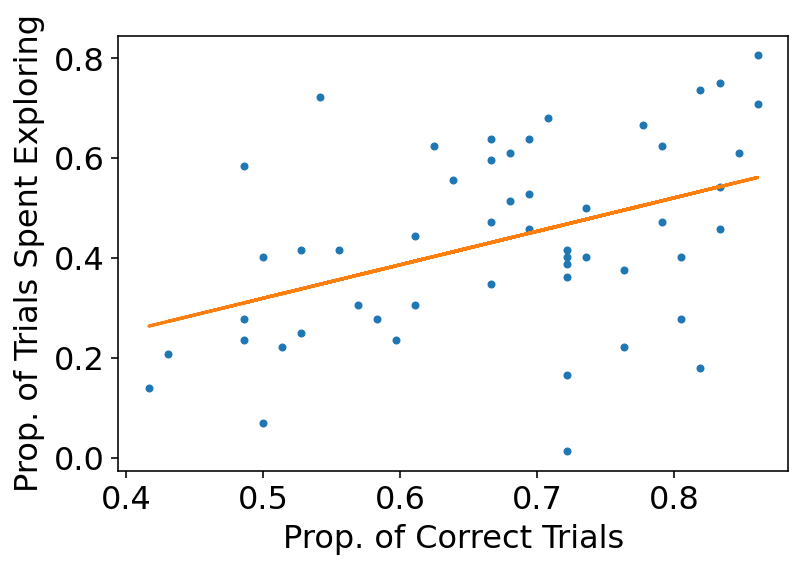

In [ ]:
#correlation between dot comparison accuracy and math skills
x = df_corr["correct"]
y = df_corr["explore"]

b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.xlabel("Prop. of Correct Trials")
plt.ylabel("Prop. of Trials Spent Exploring")
plt.show()

These scatterplots clearly show that even though there's a general positive trend between overall dot comparison accuracy and children's exploration tendencies and math skills, there is a lot of uncertainty around this estimate. These aren't _super_ strong correlations.

### Exploration across time

Before I move onto estimating the hierarchical logistic models, I examine how the tendency to explore the arrays changes as a function of trial number. It is possible that once children become familiar with the task and have a general sense of how they are performing, they adjust their switching behavior.

This is the form of the model I am running, where I am predicting exploration on each trial (0=exploit, 1=explore) with trial number and the data are nested by child.

$$ Explore \sim TrialNum + ( 1 | Child )$$


In [ ]:
path = "/content/drive/MyDrive/data/PINK_ChildANS_Clean.csv"
df = pd.read_csv(path)

#run models
explore_mod = Lmer("explore  ~ trial_num + (1|ID)",
             data=df, family = 'binomial')

print(explore_mod.fit())

Formula: explore~trial_num+(1|ID)

Family: binomial	 Inference: parametric

Number of observations: 3744	 Groups: {'ID': 52.0}

Log-likelihood: -2338.782 	 AIC: 4683.564

Random effects:

           Name    Var    Std
ID  (Intercept)  0.772  0.879

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE  ...  Prob_97.5_ci  Z-stat  P-val  Sig
(Intercept)     0.132  -0.145    0.409  0.141  ...         0.601   0.932  0.351     
trial_num      -0.012  -0.016   -0.009  0.002  ...         0.498  -7.170  0.000  ***

[2 rows x 13 columns]


In general, children are less likely to explore (i.e., switch between dot arrays more than once) as the dot comparison task progresses. The effect size is relatively small though, which could be due to variability in exploration tendencies across children.

### Hierarchical logistic regression

Next, I am interested in seeing how children's (exploration) behaviors, quantified in three ways, as well as their math skills, relate to their trial-by-trial accuracy on the task. 

Children's exploration behavior are captured in these three variables:
- Trial-level switching frequency
- Proportion of trials spent exploring
- Learning rate

I estimate sets of hierarchical logistic regression models predicting trial-level accuracy with one of these three variables in each set, along with children's math skills and task difficulty as a control variable. The random effect is participant ID. I use hierarchical models to examine trial-level/level-1 and child-level/level-2 variables, and I do not include the three exploration variables above in the same models to reduce model complexity.

Here are the models I am running:

#### Set 1
Level-1 variables only: $Accuracy \sim 1 + Switching Frequency + Ratio + (1 | Child)$ <br>
Add Level-2 variable: $Accuracy \sim 1 + Switching Frequency + Ratio + MathSkill + (1 | Child)$ <br>
Add cross-level interaction: $Accuracy \sim 1 + Switching Frequency + Ratio + MathSkill + Switching*MathSkill (1 | Child)$ <br>

<br>

#### Set 2
Level-1 variables only: $Accuracy \sim 1 + Ratio + (1 | Child)$ <br>
Add Level-2 variable: $Accuracy \sim 1 + Ratio + TrialsExplore +  MathSkill + (1 | Child)$ <br>
Add level-2 Interaction: $Accuracy \sim 1 + Ratio + TrialsExplore +  MathSkill + TrialsExplore*MathSkill + (1 | Child)$ <br>

<br>

#### Set 3
Level-1 variables only: $Accuracy \sim 1 + Ratio + (1 | Child)$ <br>
Add Level-2 variable: $Accuracy \sim 1 + Ratio + LearningRate +  MathSkill + (1 | Child)$ <br>
Add level-2 Interaction: $Accuracy \sim 1 + Ratio + LearningRate +  MathSkill + LearningRate*MathSkill + (1 | Child)$ <br>


## Set 1 - Trial-level switching frequency

In [ ]:
#this is overkill but I like to insert the data repeatedly just in case my runtime gets disconnected
path = "/content/drive/MyDrive/data/PINK_ChildANS_Clean.csv"
df = pd.read_csv(path)

In [ ]:
#rescale vars
df["switches_z"] = stats.zscore(df["switches"])
df["math_z"] = stats.zscore(df["math"])

In [ ]:
#run models
set1m1 = Lmer("correct  ~ ratio + switches_z  + (1|ID)",
             data=df, family = 'binomial')

print(set1m1.fit())

set1m2 = Lmer("correct  ~ ratio + switches_z + math_z  + (1|ID)",
             data=df, family = 'binomial')

print(set1m2.fit())

set1m3 = Lmer("correct  ~ ratio + switches_z + math_z + switches_z*math_z  + (1|ID)",
             data=df, family = 'binomial')

print(set1m3.fit())

Formula: correct~ratio+switches_z+(1|ID)

Family: binomial	 Inference: parametric

Number of observations: 3744	 Groups: {'ID': 52.0}

Log-likelihood: -2256.415 	 AIC: 4520.829

Random effects:

           Name    Var   Std
ID  (Intercept)  0.271  0.52

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE  ...  Prob_97.5_ci  Z-stat  P-val  Sig
(Intercept)    -0.743  -1.087   -0.398  0.176  ...         0.402  -4.227  0.000  ***
ratio           1.058   0.841    1.276  0.111  ...         0.782   9.532  0.000  ***
switches_z      0.029  -0.048    0.106  0.039  ...         0.526   0.730  0.465     

[3 rows x 13 columns]
Formula: correct~ratio+switches_z+math_z+(1|ID)

Family: binomial	 Inference: parametric

Number of observations: 3744	 Groups: {'ID': 52.0}

Log-likelihood: -2252.639 	 AIC: 4515.278

Random effects:

           Name    Var    Std
ID  (Intercept)  0.225  0.474

No random effect correlations specified

Fixed effects:

      

In [ ]:
#get odds ratio for math score variable
odds = np.exp(.221)
print("Odds ratio=", odds)

#get prob
prob = odds / (1 + odds)
print("Probability=", prob)

Odds ratio= 1.2473234305640648
Probability= 0.5550262207923468


As expected, ratio (an index of task difficulty) relates to trial-level task accuracy. Also, math ability is related to overall task accuracy, such that children with higher scores on the standardized math assessment generally perform better in dot comparison (note the value of the estimate and its relatively wide confidence interval though!). The frequency of switches on each trial and accuracy were not related.

## Set 2 - Proportion of trials spent exploring

In [ ]:
#create proportion variable and merge datasets by ID

df1 = df.copy()
df_agg = df.copy()
df_agg = df_agg.groupby('ID', as_index=False).mean()
df_agg = df_agg[['ID', 'explore']]

df_exp = df1.merge(df_agg, on=['ID'])
df_exp["explore_z"] = stats.zscore(df_exp["explore_y"])
#print(df_exp) #to check

In [ ]:
#run models
set2m1 = Lmer("correct  ~ ratio + (1|ID)",
             data=df_exp, family = 'binomial')

print(set2m1.fit())

set2m2 = Lmer("correct  ~ ratio + explore_z + math_z  + (1|ID)",
             data=df_exp, family = 'binomial')

print(set2m2.fit())

set2m3 = Lmer("correct  ~ ratio + explore_z + math_z + explore_z*math_z  + (1|ID)",
             data=df_exp, family = 'binomial')

print(set2m3.fit())

Formula: correct~ratio+(1|ID)

Family: binomial	 Inference: parametric

Number of observations: 3744	 Groups: {'ID': 52.0}

Log-likelihood: -2256.682 	 AIC: 4519.363

Random effects:

           Name    Var    Std
ID  (Intercept)  0.276  0.525

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE  ...  Prob_97.5_ci  Z-stat  P-val  Sig
(Intercept)    -0.742  -1.087   -0.397  0.176  ...         0.402  -4.218    0.0  ***
ratio           1.058   0.840    1.275  0.111  ...         0.782   9.530    0.0  ***

[2 rows x 13 columns]
Formula: correct~ratio+explore_z+math_z+(1|ID)

Family: binomial	 Inference: parametric

Number of observations: 3744	 Groups: {'ID': 52.0}

Log-likelihood: -2248.157 	 AIC: 4506.314

Random effects:

           Name   Var    Std
ID  (Intercept)  0.18  0.424

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE  ...  Prob_97.5_ci  Z-stat  P-val  Sig
(Intercept)    -0.

In [ ]:
#get odds ratio for explore prop.
odds = np.exp(.224)
print("Odds ratio=", odds)

#get prob
prob = odds / (1 + odds)
print("Probability=", prob)

Odds ratio= 1.2510710194283623
Probability= 0.5557670142926275


The proportion of trials spent exploring is related to task accuracy, but this relation is not moderated by math ability.

## Set 3 - Learning rate

In [ ]:
#df_new from above should contain the learning rate estimates
df2 = df.copy()
df_lrs = df2.merge(df_new, on=['ID'])
df_lrs["lr_z"] = stats.zscore(df_lrs["learn_rate_est"])
#print(df_lrs) #to check

In [ ]:
#run models
set3m1 = Lmer("correct_x  ~ ratio  + (1|ID)",
             data=df_lrs, family = 'binomial')

print(set3m1.fit())

set3m2 = Lmer("correct_x  ~ ratio + lr_z + math_z  + (1|ID)",
             data=df_lrs, family = 'binomial')

print(set3m2.fit())

set3m3 = Lmer("correct_x  ~ ratio + lr_z + math_z + lr_z*math_z  + (1|ID)",
             data=df_lrs, family = 'binomial')

print(set3m3.fit())

Formula: correct_x~ratio+(1|ID)

Family: binomial	 Inference: parametric

Number of observations: 3744	 Groups: {'ID': 52.0}

Log-likelihood: -2256.682 	 AIC: 4519.363

Random effects:

           Name    Var    Std
ID  (Intercept)  0.276  0.525

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE  ...  Prob_97.5_ci  Z-stat  P-val  Sig
(Intercept)    -0.742  -1.087   -0.397  0.176  ...         0.402  -4.218    0.0  ***
ratio           1.058   0.840    1.275  0.111  ...         0.782   9.530    0.0  ***

[2 rows x 13 columns]
Formula: correct_x~ratio+lr_z+math_z+(1|ID)

Family: binomial	 Inference: parametric

Number of observations: 3744	 Groups: {'ID': 52.0}

Log-likelihood: -2252.640 	 AIC: 4515.279

Random effects:

           Name    Var    Std
ID  (Intercept)  0.227  0.476

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE  ...  Prob_97.5_ci  Z-stat  P-val  Sig
(Intercept)    -0

Child-level learning rate is not related to task accuracy.

### Summary of hiearchical logistic models

- Children's performance on the approximate number comparison task is related to  task difficulty and math ability. 
- Accuracy is ratio-dependent, such that children are less accurate on trials that are considered more difficult, i.e., the ratio of the larger to smaller number of dots is close to 1. 
- Children with higher math skills, indexed by their performance on a standardized math assessment, generally perform better. 
- The only "exploration behavior" variable that relates to task accuracy is the proportion of trials spent exploring. Children who spend more trials exploring the dot arrays generally perform better on the task (though this estimate is relatively small). 

## Conclusions

The aim of this project was to examine one way that children visually explore in an approximate number or dot comparison task. Specifically, I calculated the frequency with which children switched between the dot arrays on each trial and operationalized exploration behavior as greater than one switch (and exploitation as one or less switch). I hypothesized that children who explored more often would perform better on the task and that this association would be moderated by math ability. This expectation was informed by prior research on children's exploration tendencies, and relations between their approximate number system acuity and math skills. 

Since the model fitting procedure was not entirely successful, I will not comment on the differences between the random and RL models here.

The post-hoc analyses examining the relation between task accuracy, children's exploration behaviors, and math skills revealed that the proportion of trials children spent exploring, but not trial-level exploration behavior or learning rate, was associated with their overall accuracy. These indices of children's exploration behavior were similar but not exactly the same. The proportion of trials spent exploring cannot be used to examine the time course of children's actions. The learning rate reflects the extent to which children update their beliefs or exploration behavior in response to feedback, but I take this value (aside from being difficult to interpret) to reflect how _consistently_ children act, which is not as informative of their exploration or exploitation tendencies as the other two variables, the frequency of switches and the proportion of trials exploring.

Lastly, counter to my expectations, the relation between children's exploration behaviors and dot comparison accuracy was not moderated by math ability. However, overall exploration tendency is generally beneficial for correctness. In the future, I would like to examine other forms of visual exploration in this task, e.g., local vs. global search where local search might look like a series of gaze points at a group of densely packed dots and global search might look like saccades of a particular distance between groups of dots.

Overall, the most interesting result of this project is the range of individual variability in the various metrics examined: children's approximate number comparison accuracy, the frequency of switches between arrays, the proportion of trials spent exploring, and math skills. While the post-hoc analyses did not reveal how exploration may only benefit some children (e.g., who differ in math ability), this project contributes to an emerging field on children's exploration and curiosity: Although children are generally explorative (e.g., on a multi-armed bandit task; Sumner et al., 2019), their behaviors may be highly variable in different tasks or contexts, and these individual differences in exploration may relate to their success in such tasks. 

<br>

#### References

Cueli, M., Areces,D., Garcia, T., Alves, R. A., & Gonzalez-Castro, P. (2020). Attention, inhibitory control and early mathematical skills in preschool students. Psciothema, 32(2), 237-244. https://doi.org/10.7334/psicothema2019.225

Daw, N. D. (2011). Trial-by-trial data analysis using computational models. In Decision Making, Affect, and Learning: Attention and Performance XXIII Oxford University Press. https://doi.org/10.1093/acprof:oso/9780199600434.003.0001

Guillaume, M., Nys, J., Mussolin, C. & Content, A. (2013). Differences in the acuity of the approximate number system in adults: The effect of mathematical ability. Act Psychologica, 144, 506-512. https://doi.org/10.1016/j.actpsy.2013.09.001

Libertus, M. E., & Brannon, E. M. (2009). Behavioral and Neural Basis of Number Sense in Infancy. Current directions in psychological science, 18(6), 346–351.  https://doi.org/10.1111/j.1467-8721.2009.01665.x 

Libertus, M. E., Feigenson, L., & Halberda, J. (2013). Is approximate number precision a stable predictor of math ability? Learning and Individual Differences, 25, 126-133. https://doi.org/10.1016/j.lindif.2013.02.001

Sumner, E., Li, A. X., Perfors, A., Hayes, B., Navarro, D., & Sarnecka, B. W. (2019, September 4). The Exploration Advantage: Children’s instinct to explore allows them to find information that adults miss. https://doi.org/10.31234/osf.io/h437v 

Vallortigara, G. (2017). Comparative cognition of number and space: the case of geometry and of the mental number line. Philosophical Transactions of the Royal Society.

Wilson, R. C., & Collins, A. G. E. (2019). Ten simple rules for the computational modeling of behavioral data. eLife, 8, e49547. https://doi.org/10.7554/eLife.49547
